# digit recognition using homemade neural network

In [55]:
import numpy
import pandas
from matplotlib import pyplot

In [56]:
data = pandas.read_csv('mnist.csv')
data = numpy.array(data)
rows, columns = data.shape
numpy.random.shuffle(data)

let's seperate the data into a training and testing set.

In [57]:
dataTest = data[0:3000].T
yTest = dataTest[0]
xTest = dataTest[1:columns]
xTest = xTest / 255

dataTrain = data[3000:rows].T
yTrain = dataTrain[0]
xTrain = dataTrain[1:columns]
xTrain = xTrain / 255

now let's create weights and biases for our neural network.

In [58]:
def createParameters():
    w1 = numpy.random.rand(10, 784) - 0.5
    b1 = numpy.random.rand(10, 1) - 0.5
    w2 = numpy.random.rand(10, 10) - 0.5
    b2 = numpy.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2

step 1 - forward propagation

In [59]:
def ReLU(z):
    return numpy.maximum(0, z)

def softmax(z):
    exp = numpy.exp(z - numpy.max(z)) 
    return exp / exp.sum(axis=0)

def forwardPropagation(w1, b1, w2, b2, x):
    z1 = w1.dot(x) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

step 2 - backward propagation

In [60]:
def oneHot(y):
    oneHotY = numpy.zeros((y.size, y.max() + 1))
    oneHotY[numpy.arange(y.size), y] = 1
    oneHotY = oneHotY.T
    return oneHotY

def derivative_ReLU(z):
    return z > 0

def backwardPropagation(z1, a1, z2, a2, w2, x, y):
    oneHotY = oneHot(y)
    rows = y.size
    dz2 = a2 - oneHotY
    dw2 = 1 / rows * dz2.dot(a1.T)
    db2 = 1 / rows * numpy.sum(dz2)
    dz1 = w2.T.dot(dz2) * derivative_ReLU(z1)
    dw1 = 1 / rows * dz2.dot(x.T)
    db1 = 1 / rows * numpy.sum(dz1)
    return dw1, db1, dw2, db2

step 3 - adjust weight and bias

In [61]:
def adjustParameters(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    return w1, b1, w2, b2

In [62]:
def getPredictions(a2):
    return numpy.argmax(a2, 0)

def findAccuracy(predictions, y):
    print(predictions, y)
    return numpy.sum(predictions == y) / y.size

def gradientDescent(x, y, iterations, alpha):
    w1, b1, w2, b2 = createParameters()
    for i in range(iterations):
        z1, a1, z2, a2 = forwardPropagation(w1, b1, w2, b2, x)
        dw1, db1, dw2, db2 = backwardPropagation(z1, a1, z2, a2, w2, x, y)
        w1, b1, w2, b2 = adjustParameters(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if (i % 10 == 0):
            print("iteration: ", i)
            print("accuracy: ", findAccuracy(getPredictions(a2), y))
    return w1, b1, w2, b2

let's train the neural network with our partitioned data.

In [63]:
w1, b1, w2, b2 = gradientDescent(xTrain, yTrain, 500, 0.1)

iteration:  0
[1 1 1 ... 9 1 1] [7 8 9 ... 6 8 3]
accuracy:  0.11664102564102564
iteration:  10
[0 3 2 ... 9 8 7] [7 8 9 ... 6 8 3]
accuracy:  0.1803846153846154
iteration:  20
[7 3 7 ... 9 8 7] [7 8 9 ... 6 8 3]
accuracy:  0.32271794871794873
iteration:  30
[7 3 9 ... 6 8 2] [7 8 9 ... 6 8 3]
accuracy:  0.4478974358974359
iteration:  40
[7 3 9 ... 6 8 2] [7 8 9 ... 6 8 3]
accuracy:  0.5404615384615384
iteration:  50
[7 3 9 ... 6 1 2] [7 8 9 ... 6 8 3]
accuracy:  0.6142820512820513
iteration:  60
[7 3 9 ... 6 1 2] [7 8 9 ... 6 8 3]
accuracy:  0.6665384615384615
iteration:  70
[7 3 9 ... 6 1 2] [7 8 9 ... 6 8 3]
accuracy:  0.7028461538461539
iteration:  80
[7 3 9 ... 6 1 2] [7 8 9 ... 6 8 3]
accuracy:  0.7281025641025641
iteration:  90
[7 3 9 ... 6 1 2] [7 8 9 ... 6 8 3]
accuracy:  0.7455897435897436
iteration:  100
[7 3 9 ... 6 1 2] [7 8 9 ... 6 8 3]
accuracy:  0.7596923076923077
iteration:  110
[7 3 9 ... 6 1 2] [7 8 9 ... 6 8 3]
accuracy:  0.7711282051282051
iteration:  120
[7 3 9 ..

~85% accuracy on training set after 500 iterations.

In [70]:
def makePredictions(x, w1, b1, w2, b2):
    _, _, _, a2 = forwardPropagation(w1, b1, w2, b2, x)
    predictions = getPredictions(a2)
    return predictions

def checkPrediction(index, W1, b1, W2, b2, dataset = "train"):
    if dataset == "train":
        current_image = xTrain[:, index, None]
        prediction = makePredictions(xTrain[:, index, None], W1, b1, W2, b2)
        label = yTrain[index]
    else:
        current_image = xTest[:, index, None]
        prediction = makePredictions(xTest[:, index, None], W1, b1, W2, b2)
        label = yTest[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    pyplot.gray()
    pyplot.imshow(current_image, interpolation='nearest')
    pyplot.show()

we can test certain indexes to compare our model's prediction and the data's label.

Prediction:  [7]
Label:  7


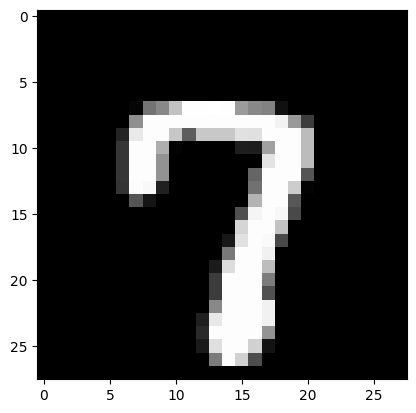

Prediction:  [8]
Label:  8


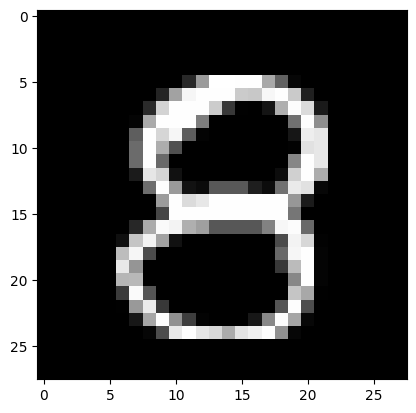

Prediction:  [9]
Label:  9


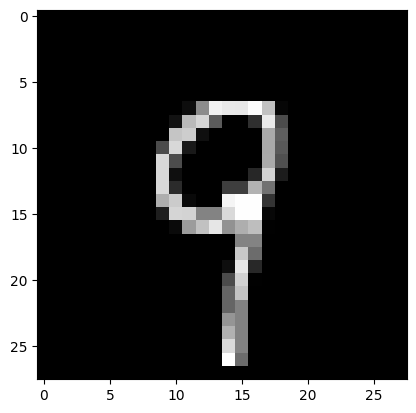

Prediction:  [3]
Label:  3


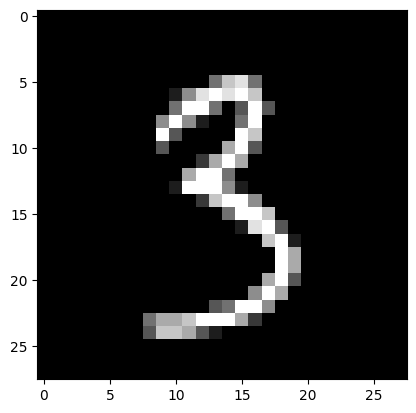

In [65]:
checkPrediction(0, w1, b1, w2, b2)
checkPrediction(1, w1, b1, w2, b2)
checkPrediction(2, w1, b1, w2, b2)
checkPrediction(3, w1, b1, w2, b2)

now lets apply our model to the testing data set. we don't want to call the `gradientDescent()` function because that would train our model, not test it.

In [66]:
testPredictions = makePredictions(xTest, w1, b1, w2, b2)
findAccuracy(testPredictions, yTest)

[1 8 9 ... 2 6 8] [1 8 9 ... 2 6 8]


0.8623333333333333

Prediction:  [1]
Label:  1


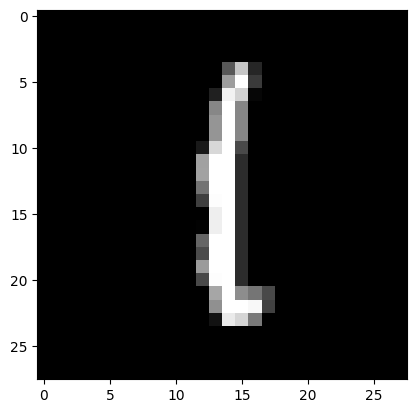

Prediction:  [8]
Label:  8


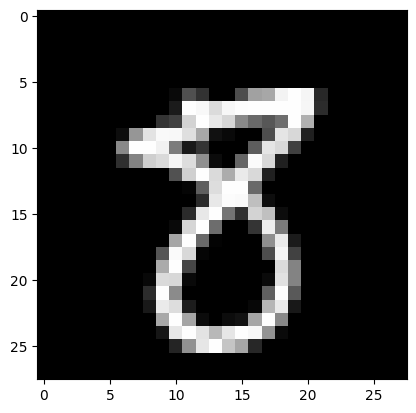

Prediction:  [9]
Label:  9


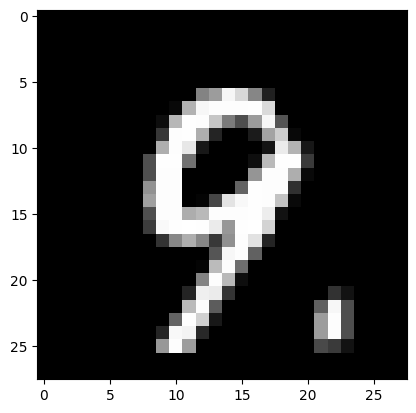

Prediction:  [6]
Label:  6


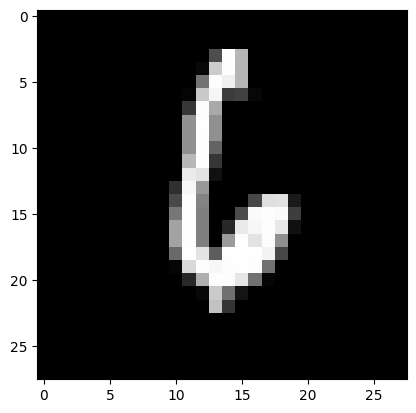

In [71]:
checkPrediction(0, w1, b1, w2, b2, "test")
checkPrediction(1, w1, b1, w2, b2, "test")
checkPrediction(2, w1, b1, w2, b2, "test")
checkPrediction(3, w1, b1, w2, b2, "test")